# Data Structures and Processing

## Week 10: Time Series

### Remarks:

1. Install the libraries listed below using your package manager.  An example of installing the library `numpy` is to issue a the following command on a terminal (in Ubuntu) `python3 -m pip install numpy`.

2. Make sure that you are following the conventions.  For examples, `import numpy as np`, which imports `numpy` packages and sets the abbreviation for it.

3. Do not import the packages without the short names, unless it is intentional.  Doing so might lead to a namespace conflict, or unintended uses of functions coming from two libraries as a part of different implementations.

4. We are assigning `None` to variables and use `pass` in the body of the functions, where we expect a solution from you.  Please replace these values and statements with your solution.

The exercises in this notebook are aligned with the material provided for the lecture.

### Load Libraries

In [10]:
import numpy as np
import pandas as pd
import datetime as dtime

## Task 1

Consider a file `IBM.csv` attached to this notebook, which contains stocks since 2000 of IBM.  Import the data from the file as a pandas `DataFrame` into a variable `ts1`.  Since there is no mentioning of index, therefore, the default integer incremented index is associated.  Notice that one of the column is named `"Date"`.  We would like to use this as an index for `df1`.

Your task is to use pandas builtin function to change the index of the above `DataFrame` named `df1`.

In [11]:
# Your solution goes here.
df1 = pd.read_csv("IBM.csv")
df1.set_index("Date", inplace=True)
print(df1)

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2000-01-03  107.492828  110.898659  106.955070  110.898659   60.474819   
2000-01-04  108.986618  109.464630  105.999046  107.134323   58.422073   
2000-01-05  107.970840  114.483749  107.194077  110.898659   60.474819   
2000-01-06  112.810707  113.706978  108.508606  108.986618   59.432163   
2000-01-07  112.093689  112.750954  105.760040  108.508606   59.171448   
...                ...         ...         ...         ...         ...   
2024-04-22  182.449997  183.320007  180.449997  181.899994  181.899994   
2024-04-23  182.729996  184.679993  179.000000  182.190002  182.190002   
2024-04-24  183.169998  184.289993  181.399994  184.100006  184.100006   
2024-04-25  168.199997  172.449997  165.660004  168.910004  168.910004   
2024-04-26  167.500000  167.869995  165.729996  167.130005  167.130005   

              Volume  
Date          

## Task 2

Reconsider the `DataFrame` named `df1` from Task 1 above.

Your task is to write down a function `average_until_months_end` that takes three arguments:

1. `df` a pandas `DataFrame` (for example, `df1`, as defined above)
2. `ts` a string containing a timestamp.
3. `col` as a column name.

and it returns the mean value along the column `col` with the range of time starting from the timestamp `ts` until the end of the month.


In [20]:
# Your solution goes here.
# Hint: Have a look at the documentation of `pd.tseries.offsets.MonthEnd`

def average_until_months_end(df, ts, col):
    # Converting timestamp string to datetime object
    ts_datetime = pd.to_datetime(ts)
    year = ts_datetime.year
    month = ts_datetime.month
    
    # Calculating the end of the month
    end_of_month = ts_datetime + pd.tseries.offsets.MonthEnd(0)
    
    # filtering the data frame for rows from the specified year and month until end of that month
    filtered_df = df.loc[ts_datetime:end_of_month]
    mean_value = filtered_df[col].mean()
    
    return mean_value


ts = '2000-01-03'
col = 'Close'

# Test the function
mean_value = average_until_months_end(df1, ts, col)
print("Mean value:", mean_value)

Mean value: 111.68140565000002


## Task 3

Write down a function `change_in_month` that takes three arguments:

1. `df`, the `DataFrame`,
2. `"col"`, the column name for consideration,
3. `"date"`, date as a string of the form "YYYY-mm-dd" or "YYYY/mm/dd".

that returns the difference of the values at the beginning and at the end of a particular month.

In [36]:
# Your solution goes here
def change_in_month(df, col, date):
    # Convert date string to datetime object
    date_datetime = pd.to_datetime(date)
    
    # Find start and end dates of the month
    start_of_month = date_datetime.strftime('%Y-%m-01')
    end_of_month = date_datetime.strftime('%Y-%m-%d')
    print("STart of the month is",start_of_month)
    print("STart of the month is",end_of_month)
    # Extract values for start and end dates of the month
    start_value = df.loc[start_of_month, col]
    end_value = df.loc[end_of_month, col]
    
    # Calculate difference between values
    difference = end_value - start_value
    
    return difference
    

change=change_in_month(df1,"Close","2000-02-23")
print(change)

STart of the month is 2000-02-01
STart of the month is 2000-02-23
-1.1950219999999945


## Task 4

The file `IBM.csv` has down-sampled data in it, where each record has a daily report of the `open`, `high`, `low` and `close` and other entries.

Your task is to down-sample the column `"Open"` to yearly periods reporting its `ohlc`.  Finally, plot the values for `open` and `close`.

/var/folders/cc/m3r6wr4s5450328h6_0_bqdw0000gn/T/ipykernel_21691/1347412425.py:13: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  yearly_ohlc = df['Open'].resample('Y').ohlc()


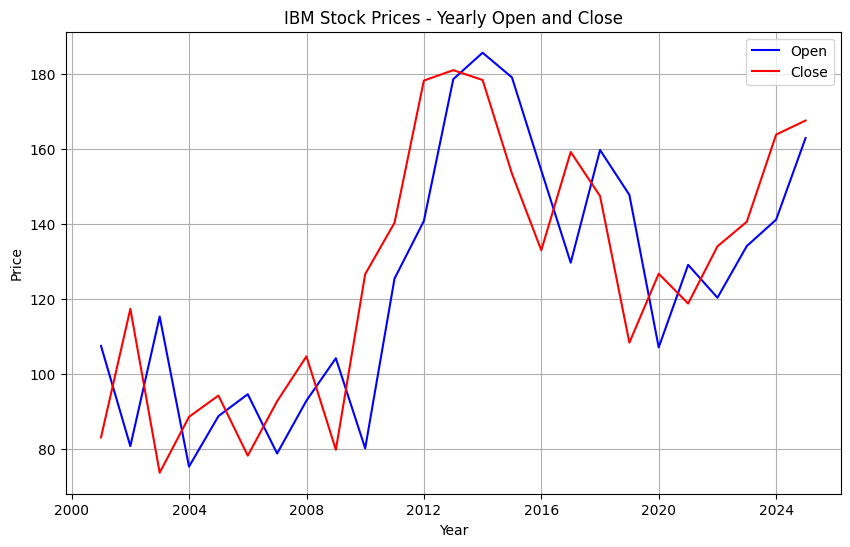

In [30]:
# Your solution goes here.
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the CSV file
df = pd.read_csv("IBM.csv")

# Convert the "Date" column to datetime format and set it as the index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Down-sample the "Open" column to yearly periods and calculate OHLC
yearly_ohlc = df['Open'].resample('Y').ohlc()

# Plot the open and close values
plt.figure(figsize=(10, 6))
plt.plot(yearly_ohlc.index, yearly_ohlc['open'], color='blue', label='Open')
plt.plot(yearly_ohlc.index, yearly_ohlc['close'], color='red', label='Close')
plt.title('IBM Stock Prices - Yearly Open and Close')
plt.xlabel('Year')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()


# Task 5

Reconsider the `IBM.csv` file containing the IBM stocks values/day.  Consider a window of 1000 days and plot mean values.

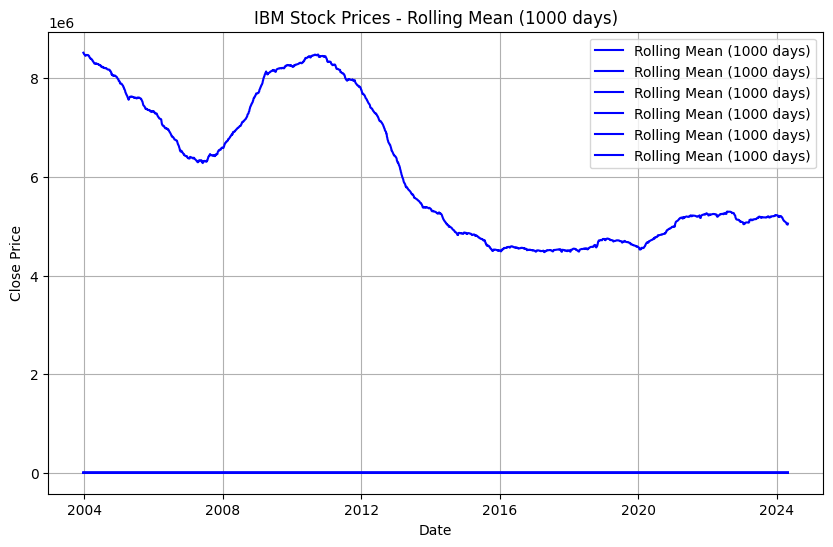

In [31]:
# Your solution goes here.
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the CSV file
df = pd.read_csv("IBM.csv")

# Convert the "Date" column to datetime format and set it as the index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Calculate the rolling mean with a window of 1000 days
rolling_mean = df.rolling(window=1000).mean()

# Plot the rolling mean
plt.figure(figsize=(10, 6))
plt.plot(rolling_mean, color='blue', label='Rolling Mean (1000 days)')
plt.title('IBM Stock Prices - Rolling Mean (1000 days)')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()

## Task 6

Reconsider the `IBM.csv` file containing the IBM stocks.  Consider a smoothing factor `alpha=0.01`, and plot the `ewm` average for the column `"Open"`, and the actual values in that column.

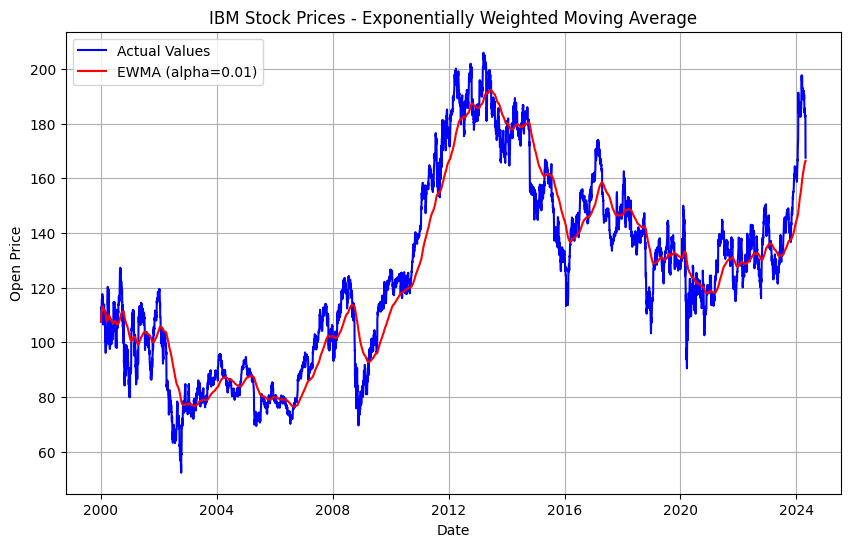

In [29]:
# Your solution goes here.
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the CSV file
df = pd.read_csv("IBM.csv")

# Convert the "Date" column to datetime format and set it as the index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Specify the smoothing factor (alpha)
alpha = 0.01

# Calculate the exponentially weighted moving average (EWMA) for the "Open" column
ewma = df['Open'].ewm(alpha=alpha).mean()

# Plot both the EWMA and the actual values from the "Open" column
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Open'], color='blue', label='Actual Values')
plt.plot(ewma.index, ewma, color='red', label=f'EWMA (alpha={alpha})')
plt.title('IBM Stock Prices - Exponentially Weighted Moving Average')
plt.xlabel('Date')
plt.ylabel('Open Price')
plt.legend()
plt.grid(True)
plt.show()
